# Introdução

A analise abaixo foi feita utilizando os dados do RH da IBM que foi disponibilizada no seguinte link: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

A motivação é entender o perfil de funcionários que deixam a empresa. Podemos usar esses dados para previnir demissões, diminuir o custo operacional e melhorar a satisfação dos funcionários envolvidos na empresa.

Hipóteses:<br>
    - H0: Existe diferença de sálarios entre homem e mulher<br>
    - H1: Não Existe diferença de sálarios entre homem e mulher<br>
    <br>
Hipóteses:<br>
    - H0: Existe relação entre satisfação no trabalho e educação  
    - H1: Não existe relação entre satisfação no trabalho e educação<br> 
    <br>
Hipóteses:<br>
    - H0: Existe relação entre idade e educação<br>
    - H1: Não Existe relação entre idade e educação<br>
    <br>
Hipóteses:<br>
    - H0: A maioria dos funcionários da IBM tem uma graduação<br>
    - H1: A minoria dos funcionários da IBM tem uma graduação
<br>.
<br>.
<br>.

<b><i>
   Nota: Análise do dataset (Estrutura) - Análise Bivariada - Análise Multivariada - Machine Learning 
</i></b>       

Informações gerais sobre o dataset
<br>
<br>
Education:<br>
-1 'Below College'<br>
-2 'College'<br>
-3 'Bachelor'<br>
-4 'Master'<br>
-5 'Doctor'<br>
<br>
<br>
EnvironmentSatisfaction:<br>
-1 'Low'<br>
-2 'Medium'<br>
-3 'High'<br>
-4 'Very High'<br>
<br>
<br>
JobInvolvement:<br>
-1 'Low'<br>
-2 'Medium'<br>
-3 'High'<br>
-4 'Very High'<br>
<br>
<br>
JobSatisfaction:<br>
-1 'Low'<br>
-2 'Medium'<br>
-3 'High'<br>
-4 'Very High'<br>
<br>
<br>
PerformanceRating:<br>
-1 'Low'<br>
-2 'Good'<br>
-3 'Excellent'<br>
-4 'Outstanding'<br>
<br>
<br>
RelationshipSatisfaction:<br>
-1 'Low'<br>
-2 'Medium'<br>
-3 'High'<br>
-4 'Very High'<br>
<br>
<br>
WorkLifeBalance:<br>
-1 'Bad'<br>
-2 'Good'<br>
-3 'Better'<br>
-4 'Best'<br>

In [10]:
#carregando libs
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('ggplot')

In [2]:
# retirando avisos
import warnings
warnings.filterwarnings('ignore')

In [4]:
#carregando dataset

rh = pd.read_csv('dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
rh.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [17]:
#analisando informações sobre a estrutura dos dados

#observamos que neste dataset não tem nenhum missing
rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Analisando os dados

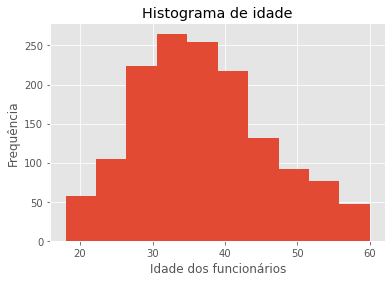

In [42]:
#plotando o histograma de idade
_= plt.hist(rh.Age)
_=plt.title('Histograma de idade')
_=plt.ylabel('Frequência')
_=plt.xlabel('Idade dos funcionários')

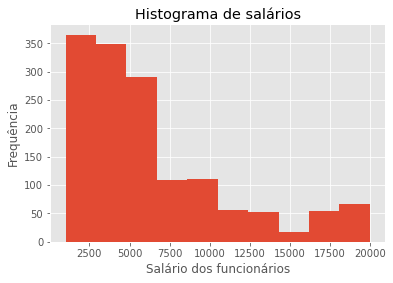

In [43]:
#plotando o histograma do salário
_= plt.hist(rh.MonthlyIncome)
_=plt.title('Histograma de salários')
_=plt.ylabel('Frequência')
_=plt.xlabel('Salário dos funcionários')

Text(0.5, 0, 'Gênero dos funcionários')

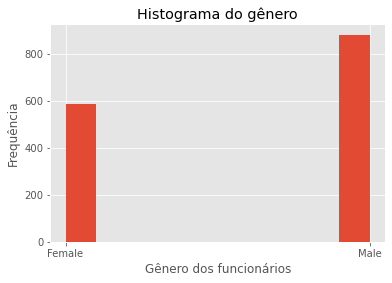

In [27]:
#plotando o histograma do genero
_= plt.hist(rh.Gender)
_=plt.title('Histograma do gênero')
_=plt.ylabel('Frequência')
_=plt.xlabel('Gênero dos funcionários')

In [44]:
#analisando o genero chegou-se a conclusão que a maioria dos funcionários é do gênero masculino
rh.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

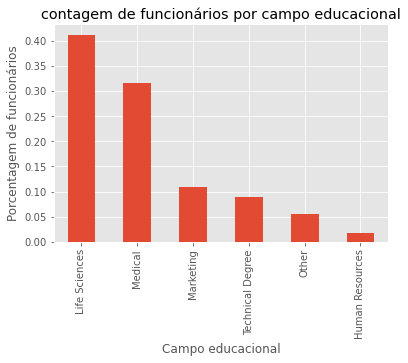

In [45]:
#analisando a porcentagem de funcionários pelo campo educacional
#observando os dados de contagem de funcionários e campo educacional conclui-se que na IBM a maioria dos funcionários trabalham como cientista 
#cerca de 40% dos funcionários da IBM são cientistas enquanto a minoria dos funcionários são dos recusos humanos
#
_ = rh.EducationField.value_counts(1).plot.bar()
_=plt.title('contagem de funcionários por campo educacional')
_=plt.ylabel('Porcentagem de funcionários')
_=plt.xlabel('Campo educacional')

# 4 Análise Bivariada

cruzando as variaveis 

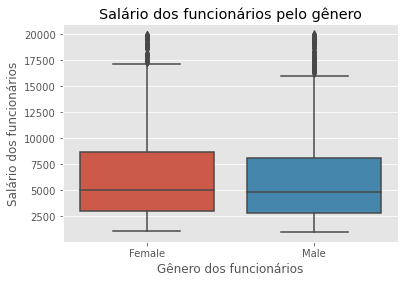

In [48]:
#Observando os dados de salário dos funcionários entre homens e mulheres observa-se que a distribuição entre os os gêneros são bem próximos

_ = sns.boxplot(x='Gender', y='MonthlyIncome', data=rh)
_=plt.title('Salário dos funcionários pelo gênero')
_=plt.ylabel('Salário dos funcionários')
_=plt.xlabel('Gênero dos funcionários')

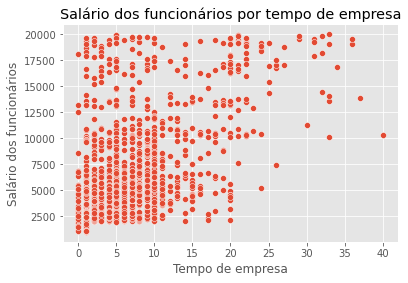

In [51]:
#Não parece ter uma relação entre o tempo na empresa e o salário dos funcionários
_ = sns.scatterplot(x='YearsAtCompany', y='MonthlyIncome', data=rh)
_=plt.title('Salário dos funcionários por tempo de empresa')
_=plt.ylabel('Salário dos funcionários')
_=plt.xlabel('Tempo de empresa')

# 5. Análise Multivariada

In [53]:
#Observando os dados encontramos uma relação entre a idade e o salário
#Observando os dados encontramos uma relação entre a tempo de empresa e o salário
rh.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
